# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from pathlib import Path
import warnings

In [178]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Loading Data

In [179]:
# You can get data from: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-rent-project

full_path = Path("../data")
path = full_path / "house_rent.csv"
data = pd.read_csv(path);

# Overlooking

In [180]:
data.head()

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,billing_cycle_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,total_price,currency_y,billing_cycle_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,estate_details_id_y,estate_rel_url,extra_info
0,ab0c8405-2ffd-4c97-bc11-8251bcd66a00,/kiraye?page=64,/items/4660031,2024-10-05 22:28:16.668326+00,219.0,AZN,ay,Gənclik m.,"3 otaqlı, 198 m², 5/16 mərtəbə","Bakı, dünən 23:48",bakı,05.10.2024,23:48,Təmirli,vipped,NaN,NaN,https://bina.azstatic.com/uploads/f460x345/202...,dad15c43-2b3e-4e59-a1d0-6cab49800f18,ab0c8405-2ffd-4c97-bc11-8251bcd66a00,/items/4660031,2024-10-05 22:30:22.787855+00,TECİLİ OTAQ YOLDASİ BEY AXTARİLİR TELEBE İSLEY...,219.0,AZN,ay,Aidə Mürsəlova,mülkiyyətçi,NaN,NaN,Əhməd bəy Ağaoğlu küç,40.397227,49.859505,yeniləndi: 04 oktyabr 2024,1109,04.10.2024,NaN,dad15c43-2b3e-4e59-a1d0-6cab49800f18,NaN,Yeni tikili,5 / 16,3.0,198 m²,NaN,var,dad15c43-2b3e-4e59-a1d0-6cab49800f18,/items/4660031,Azərbaycan turizm institutu * Gənclik m.* Nəri...
1,9c448fe1-9d6b-4edc-a707-8941f718edff,/kiraye?page=64,/items/4669283,2024-10-05 22:28:16.668326+00,700.0,AZN,ay,8 Noyabr m.,"2 otaqlı, 90 m², 14/17 mərtəbə","Bakı, dünən 23:45",bakı,05.10.2024,23:45,Təmirli,NaN,NaN,NaN,https://bina.azstatic.com/uploads/f460x345/202...,6b5d9e1b-fabe-4300-b616-cd0fdadac7a7,9c448fe1-9d6b-4edc-a707-8941f718edff,/items/4669283,2024-10-05 22:30:22.787855+00,8 Noyabir metrosun çixişinda yeni tikili binad...,700.0,AZN,ay,Mişa,mülkiyyətçi,NaN,NaN,Ceyhun Səlimov küç.,40.400899,49.824871,yeniləndi: 04 oktyabr 2024,187,04.10.2024,NaN,6b5d9e1b-fabe-4300-b616-cd0fdadac7a7,NaN,Yeni tikili,14 / 17,2.0,90 m²,NaN,var,6b5d9e1b-fabe-4300-b616-cd0fdadac7a7,/items/4669283,8 Noyabr m.* Nəsimi r.
2,c432b5fc-a490-4f90-bb49-884aa589950d,/kiraye?page=64,/items/4650898,2024-10-05 22:28:16.668326+00,1500.0,AZN,ay,Nizami m.,"3 otaqlı, 170 m², 4/17 mərtəbə","Bakı, dünən 23:17",bakı,05.10.2024,23:17,Təmirli,NaN,NaN,Agentlik,https://bina.azstatic.com/uploads/f460x345/202...,e57ce6a1-45d9-4542-96fa-81a577bb504c,c432b5fc-a490-4f90-bb49-884aa589950d,/items/4650898,2024-10-05 22:30:22.787855+00,TƏCİLİDİR❗️❗️❗EKSKLÜZİV Şəhərin Mərkəzində Niz...,1500.0,AZN,ay,Hüseyn Müəllim,vasitəçi (agent),New House Azadlıq,Daşınmaz əmlak agentliyi,Füzuli küçəsi,40.375725,49.835608,yeniləndi: 04 oktyabr 2024,245,04.10.2024,NaN,e57ce6a1-45d9-4542-96fa-81a577bb504c,NaN,Yeni tikili,4 / 17,3.0,170 m²,NaN,var,e57ce6a1-45d9-4542-96fa-81a577bb504c,/items/4650898,Beşmərtəbə * Qış parkı * Mərkəzi Univermaq * N...
3,8d7db8f6-eea5-4235-9c52-e748b7f6ab74,/kiraye?page=64,/items/4669259,2024-10-05 22:28:16.668326+00,1500.0,AZN,ay,Bayıl q.,"2 otaqlı, 80 m², 13/16 mərtəbə","Bakı, dünən 23:15",bakı,05.10.2024,23:15,Təmirli,NaN,NaN,NaN,https://bina.azstatic.com/uploads/f460x345/202...,1896351f-a234-493a-bdd7-f565ef41aeb1,8d7db8f6-eea5-4235-9c52-e748b7f6ab74,/items/4669259,2024-10-05 22:30:22.787855+00,"** Сity center, seaside boulevard, Bayil dist...",1500.0,AZN,ay,Elan sahibi,vasitəçi (agent),NaN,NaN,Xanlar küçəsi,40.351695,49.832118,yeniləndi: 04 oktyabr 2024,124,04.10.2024,NaN,1896351f-a234-493a-bdd7-f565ef41aeb1,NaN,Yeni tikili,13 / 16,2.0,80 m²,NaN,var,1896351f-a234-493a-bdd7-f565ef41aeb1,/items/4669259,Bayıl parkı * Səbail r.* Bayıl q.
4,1a145395-63f3-4eb0-940b-fa449fa63a43,/kiraye?page=64,/items/4655661,2024-10-05 22:28:16.668326+00,1000.0,AZN,ay,Nəsimi r.,"2 otaqlı, 70 m², 6/11 mərtəbə","Bakı, dünən 23:13",bakı,05.10.2024,23:13,Təmirli,NaN,NaN,Agentlik,https://bina.azstatic.com/uploads/f460x345/202...,28bef467-f183-42f6-92ef-86b5c0107472,1a145395-63f3-4eb0-940b-fa449fa63a43,/items/4655661,2024-10-05 22:30:22.787855+00,"Yerləşdiyi yer: Nəsimi rayonu, Kövkəb Səfərəli...",1000.0,AZN,ay,Elçin,vasitəçi (agent),Old Baku,Daşınmaz əmla

In [181]:
data.describe(include="all")

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,billing_cycle_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,total_price,currency_y,billing_cycle_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,estate_details_id_y,estate_rel_url,extra_info
count,33895,33895,33895,33895,33895.000000,33895,33895,33895,33895,33895,33895,33895,33895,32965,3130,651,25253,33895,33895,33895,33895,33895,33753,33895.000000,33895,33895,33894,33894,25283,25283,33895,33895.000000,33895.000000,33895,33895.000000,33895,8009,33895,2158,33895,24759,29865.000000,33895,3089,33404,33895,33895,33895
unique,33895,135,23703,37,NaN,1,2,127,8569,1146,5,37,1098,1,1,1,1,23966,33895,33895,23703,155,23225,NaN,1,2,2888,2,253,1,7553,NaN,NaN,975,NaN,37,934,33895,3,7,418,NaN,611,84,2,33895,23703,2488
top,6af00c0b-9f0a-468e-afb2-638464c6035c,/kiraye?page=81,/items/4646397,2024-10-09 05:20:05.09007+00,NaN,AZN,ay,28 May m.,100 m²,"Bakı, dünən 15:02",bakı,08.10.2024,15:02,Təmirli,vipped,featured,Agentlik,https://bina.azstatic.com/uploads/f460x345/202...,bd07d1a3-bfb1-4605-8ff4-3f6c881e1643,6af00c0b-9f0a-468e-afb2-638464c6035c,/items/4646397,2024-10-09 05:21:06.90004+00,YENİ HAYAT - PARK Azure Residence yaşayış komp...,NaN,AZN,ay,Mehdi,vasitəçi (agent),Dost Əmlak,Daşınmaz əmlak agentliyi,Mərdəkan qəsəbəsi,NaN,NaN,yeniləndi: 05 noyabr 2024,NaN,08.10.2024,15:02,bd07d1a3-bfb1-4605-8ff4-3f6c881e1643,Biznes mərkəzi,Yeni tikili,4 / 5,NaN,100 m²,8 sot,var,bd07d1a3-bfb1-4605-8ff4-3f6c881e1643,/items/4646397,Şah İsmayıl Xətai m.* Xətai r.
freq,1,674,13,1689,NaN,33895,31644,2982,184,115,33831,1689,115,32965,3130,651,25253,13,1,1,13,1688,29,NaN,33895,31644,402,29736,1120,25283,310,NaN,NaN,1258,NaN,2763,50,1,1214,20340,617,NaN,2110,353,32965,1,13,1530
mean,NaN,NaN,NaN,NaN,1777.952441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1777.952441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.399050,49.869155,NaN,667.525358,NaN,NaN,NaN,NaN,NaN,NaN,2.944149,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4870.625376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4870.625376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042150,0.083861,NaN,2117.372014,NaN,NaN,NaN,NaN,NaN,NaN,1.511639,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.448070,47.152496,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,699.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.379532,49.822780,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.388366,49.846773,NaN,172.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.403845,49.875559,NaN,496.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping some values

In [182]:
df = data
df = df.drop_duplicates(subset=["estate_rel_url_x"], keep="last")

In [183]:
df = df[["billing_cycle_x", "price", "location", "city","address", "lat", "lng", "Təmir","Kateqoriya", "Mərtəbə", "Otaq sayı", "Sahə", "Torpaq sahəsi"]]

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23703 entries, 0 to 33894
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   billing_cycle_x  23703 non-null  object 
 1   price            23703 non-null  float64
 2   location         23703 non-null  object 
 3   city             23703 non-null  object 
 4   address          23703 non-null  object 
 5   lat              23703 non-null  float64
 6   lng              23703 non-null  float64
 7   Təmir            23366 non-null  object 
 8   Kateqoriya       23703 non-null  object 
 9   Mərtəbə          17696 non-null  object 
 10  Otaq sayı        21069 non-null  float64
 11  Sahə             23703 non-null  object 
 12  Torpaq sahəsi    2108 non-null   object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In [185]:
[(item,df[item].isna().sum()) for item in df.columns if df[item].isna().sum() != 0]

[('Təmir', np.int64(337)),
 ('Mərtəbə', np.int64(6007)),
 ('Otaq sayı', np.int64(2634)),
 ('Torpaq sahəsi', np.int64(21595))]

In [186]:
sahe = df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Sahə"]

df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = sahe

df.loc[df["Torpaq sahəsi"].isna() & ~df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = df["Torpaq sahəsi"].fillna("0")

df["Torpaq sahəsi"] = df["Torpaq sahəsi"].str.split(" ", expand=True)[0].astype("float")

In [187]:
median_room_num = df.loc[(~df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"].median()

df.loc[(df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(median_room_num)

df.loc[(df["Otaq sayı"].isna()) & ~(df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(0)

In [188]:
df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Ofis", "Qaraj"])), "Mərtəbə"] = df["Mərtəbə"].fillna("1")

df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Torpaq"])), "Mərtəbə"] = df["Mərtəbə"].fillna("0")

df["Mərtəbə"] = df["Mərtəbə"].str.split("/", expand=True)[0]
df["Mərtəbə"] = df["Mərtəbə"].astype(int)

In [189]:
df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Torpaq", "Qaraj", "Ofis"])), "Təmir"] = df["Təmir"].fillna("Bilinmir")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Yeni tikili"])), "Təmir"] = df["Təmir"].fillna("var")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Köhnə tikili"])), "Təmir"] = df["Təmir"].fillna("yoxdur")

In [190]:
df["Sahə"] = df["Sahə"].str.split(" ", expand=True)[0].astype(float)

# Exploratory data analysis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>],
       [<Axes: title={'center': 'Mərtəbə'}>,
        <Axes: title={'center': 'Otaq sayı'}>,
        <Axes: title={'center': 'Sahə'}>],
       [<Axes: title={'center': 'Torpaq sahəsi'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1200x800 with 0 Axes>

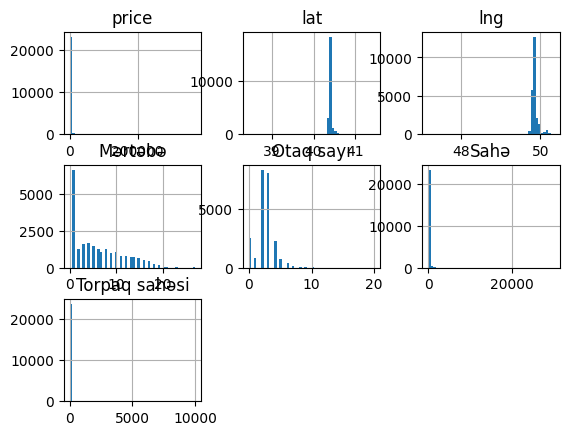

In [191]:
plt.figure(figsize=(12, 8))
df.hist(bins=50)

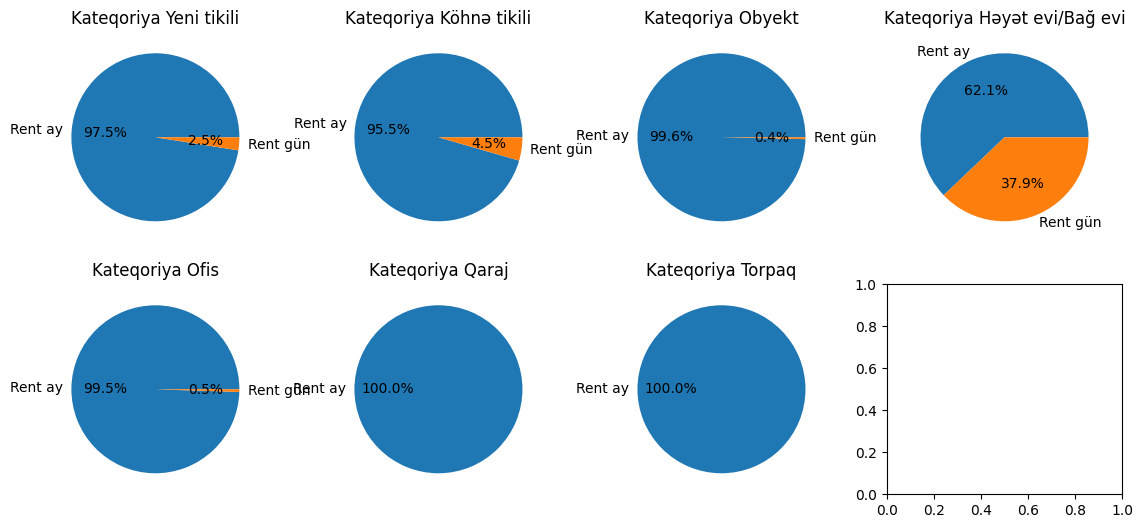

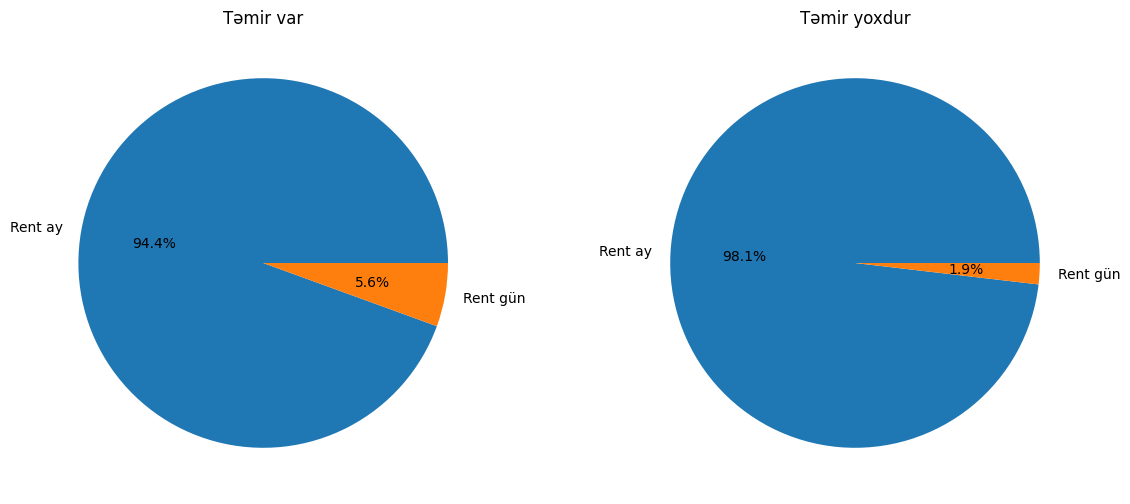

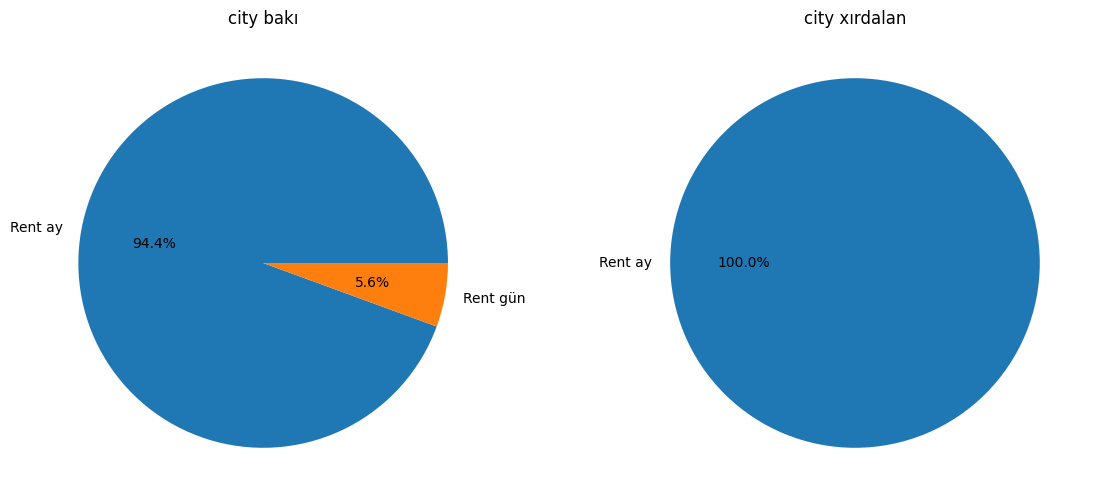

In [192]:
def creat_pie_plot(category):
    len_categoreis = len(df[category].value_counts().index)
    n_cols_categorie = round(len_categoreis / 2) if len_categoreis > 2 else 2
    n_rows_categorie = n_cols_categorie //2
    _, axes = plt.subplots(n_rows_categorie, n_cols_categorie, figsize=(14, 6))

    for axe, col in zip(axes.ravel(),df[category].value_counts().index):
        categorie_comb = df.loc[df[category] == col, [category, "billing_cycle_x"]]

        axe.pie(categorie_comb["billing_cycle_x"].value_counts().values, labels="Rent " + categorie_comb["billing_cycle_x"].value_counts().index, autopct='%1.1f%%')
        
        axe.set_title(f"{category} {categorie_comb[category].values[0]}")
    

columns = ["Kateqoriya", "Təmir", "city"]


for item in columns:
    creat_pie_plot(category=item)

# Econding some values

In [193]:
some_categories = ["billing_cycle_x", "Təmir"]
lab_encode = LabelEncoder()
for item in some_categories:
    df[item] = lab_encode.fit_transform(df[item])

In [194]:
col_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ["Kateqoriya", "city"]),
    (StandardScaler(), ["Mərtəbə", "Otaq sayı", "lat", "lng"]),
    (MinMaxScaler(), ["price", "Sahə", "Torpaq sahəsi"])
)
col_transformer.set_output(transform="pandas")

df_new = col_transformer.fit_transform(df)

df = pd.concat([df["billing_cycle_x"], df_new], axis=1)

In [195]:
df

,billing_cycle_x,onehotencoder__Kateqoriya_Həyət evi/Bağ evi,onehotencoder__Kateqoriya_Köhnə tikili,onehotencoder__Kateqoriya_Obyekt,onehotencoder__Kateqoriya_Ofis,onehotencoder__Kateqoriya_Qaraj,onehotencoder__Kateqoriya_Torpaq,onehotencoder__Kateqoriya_Yeni tikili,onehotencoder__city_astara,onehotencoder__city_ağdam,onehotencoder__city_bakı,onehotencoder__city_xaçmaz,onehotencoder__city_xırdalan,standardscaler__Mərtəbə,standardscaler__Otaq sayı,standardscaler__lat,standardscaler__lng,minmaxscaler__price,minmaxscaler__Sahə,minmaxscaler__Torpaq sahəsi
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.257639,0.247277,-0.040485,-0.102583,0.000565,0.006501,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.435822,-0.358470,0.044878,-0.521090,0.001865,0.002900,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.247660,-0.358470,-1.099133,-0.433523,0.004027,0.002567,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.069476,-0.358470,-0.519803,-0.096446,0.002676,0.002234,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.069476,0.853025,-0.353128,0.018562,0.004027,0.006234,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33890,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.623985,0.247277,-0.071615,-0.412353,0.002135,0.006567,0.0
33891,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.306848,-0.358470,-0.592117,-0.291877,0.004027,0.003567,0.0
33892,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.059498,0.853025,-0.253626,-0.249486,0.003757,0.006567,0.0
33893,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.010288,-1.569966,-0.209326,1.038233,0.006730,0.003900,0.0


# Building Model

In [196]:
X, y = df.drop(columns=["billing_cycle_x"]), df["billing_cycle_x"]

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

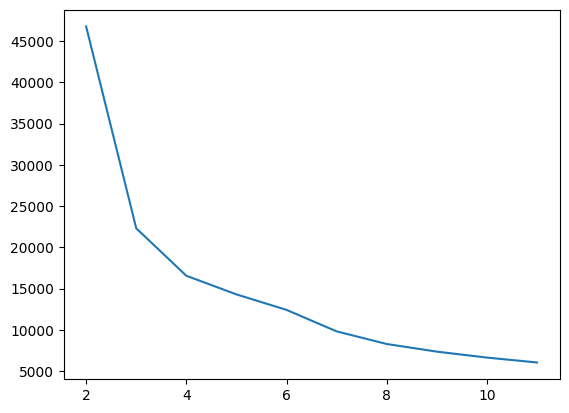

In [ ]:
# elbow technique
cs = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X, y)
    cs.append(kmeans.inertia_)

plt.plot(range(2, 12), cs)

In [ ]:

for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=2)
    labels = kmeans.fit_predict(X, y)

    correct_labels = sum(labels == y)
    silhoute = silhouette_score(X, labels)
    caliski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    print(f"clusters {i}")
    print(f"Silhoute - {silhoute}, Caliski - {caliski}, Daveis - {davies}")
    print(f"Correctly guassed {correct_labels} from  {y.size}")
    print(f"Accuracy {100*(correct_labels / y.size):0.2f}")


clusters 2
Silhoute - 0.6616237397462855, Caliski - 17612.564069839813, Daveis - 0.5267969990875021
Correctly guassed 22202 from  23703
Accuracy 93.67
clusters 3
Silhoute - 0.4402952478303402, Caliski - 24182.958599621616, Daveis - 0.7313818956360953
Correctly guassed 1210 from  23703
Accuracy 5.10
clusters 4
Silhoute - 0.42347042681151104, Caliski - 24456.83442708257, Daveis - 0.7255269935205422
Correctly guassed 10094 from  23703
Accuracy 42.59
clusters 5
Silhoute - 0.37790416989730524, Caliski - 22201.340424368245, Daveis - 0.8333547843272988
Correctly guassed 4585 from  23703
Accuracy 19.34
clusters 6
Silhoute - 0.40254099734531845, Caliski - 22815.2553089741, Daveis - 0.7050492658042623
Correctly guassed 9178 from  23703
Accuracy 38.72
clusters 7
Silhoute - 0.38646932428764713, Caliski - 23331.89117803869, Daveis - 0.7128633966988202
Correctly guassed 2413 from  23703
Accuracy 10.18
clusters 8
Silhoute - 0.3930648690621776, Caliski - 24313.011026147018, Daveis - 0.7220227991408315

In [201]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=2)
labels = kmeans.fit_predict(X, y)

<Axes: xlabel='pca1', ylabel='pca2'>

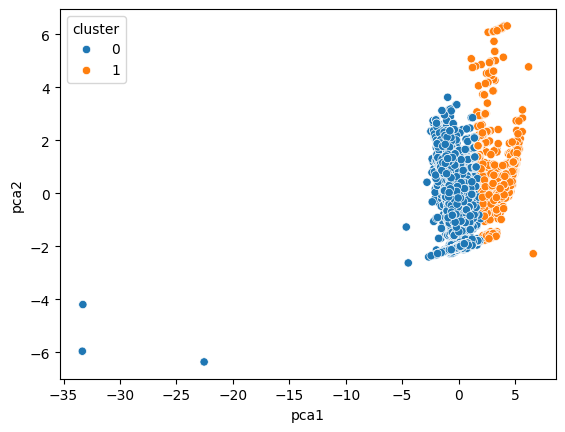

In [202]:
pca2 = pd.DataFrame(data=X, columns=["pca1", "pca2"])
df_pca2 = pd.concat([pca2, pd.DataFrame({"cluster": labels})], axis=1)
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca2)

In [ ]:
dbscan = DBSCAN(eps=1, n_jobs=-1)
labels = dbscan.fit_predict(X, y)

correct_labels = sum(labels == y)
silhoute = silhouette_score(X, labels)
caliski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)
print(f"Silhoute - {silhoute}, Caliski - {caliski}, Daveis - {davies}")
print(f"Correctly guassed {correct_labels} from  {y.size}")

Silhoute - 0.8869882115809703, Caliski - 386.8421754850143, Daveis - 1.3366922078592176
Correctly guassed 22374 from  23703


<Axes: xlabel='pca1', ylabel='pca2'>

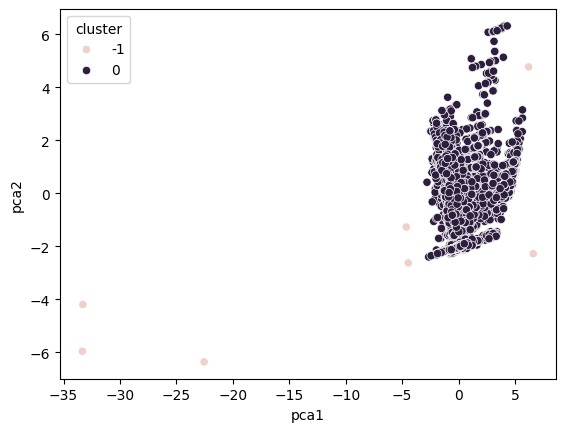

In [204]:
df_pca2 = pd.concat([pca2, pd.DataFrame({"cluster": labels})], axis=1)
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca2)